Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
# cell for imports. All imports must go here.
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [2]:
data_path = "train.csv"
titanic_data_frame = pd.read_csv(data_path);

In [3]:
titanic_data_frame.info()
titanic_data_frame.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

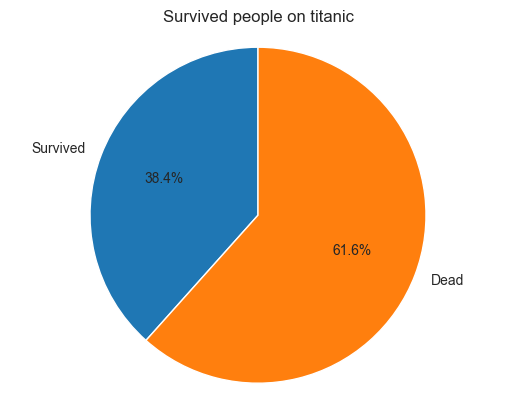

In [4]:
survived_count = titanic_data_frame["Survived"].value_counts()
labels = ["Survived", "Dead"]
sizes = [survived_count[1], survived_count[0]]
fig1, survived_pie = plt.subplots()
survived_pie.pie(sizes, autopct='%1.1f%%', labels=labels, startangle=90)
survived_pie.axis("equal")
plt.title("Survived people on titanic")
plt.show()

З отриманої діаграми видно що більше половини людей загинуло, точніше 61.6%

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


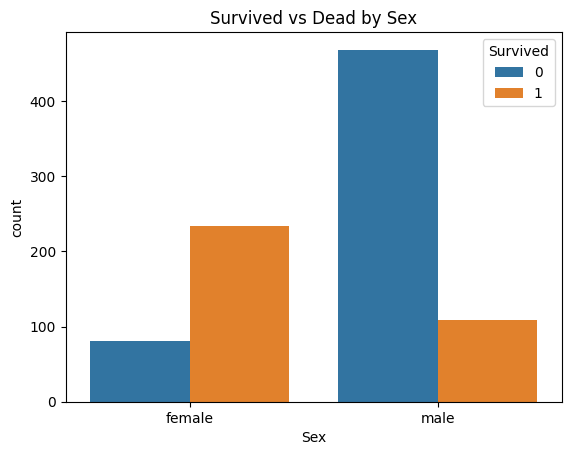

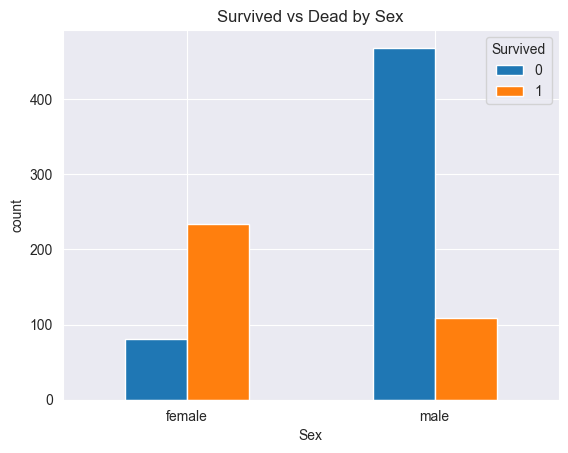

In [5]:
grouped_data = titanic_data_frame.groupby(["Sex", "Survived"]).size()
grouped_data = grouped_data.reset_index(name="Count").pivot_table(index="Sex", columns="Survived", values="Count", fill_value=0)
survived_by_sex_bar = grouped_data.plot.bar(rot=0)
plt.title("Survived vs Dead by Sex")
plt.ylabel("count")
plt.show()

З діаграми можна стверджувати що жінок вижило набагато більше ніж чоловіків, оскільки на рятувальні шлюпки в першу чергу потрапляли жіники і діти

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

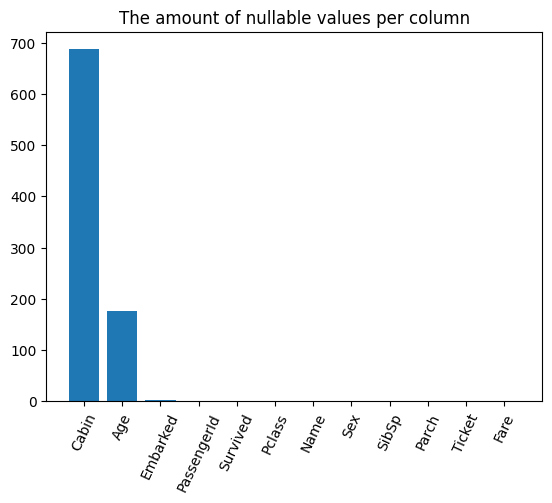

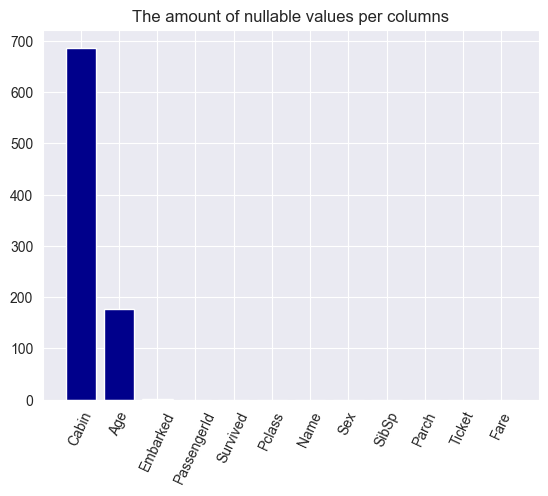

In [6]:
missing_values_count = titanic_data_frame.isna().sum().sort_values(ascending=False)
plt.bar(missing_values_count.index, missing_values_count.values, color="darkblue")
plt.title("The amount of nullable values per columns")
plt.xticks(rotation=65)
plt.show()

На мою думку досить дивно що дуже багато пропущених значень в стовпчику кабіна, певно ці дані були втрачені під час катастрофи, вік пасажирів також пропущено в деяких випадках, на мою думку через те що на Титаніку були й бідні люди, які не мали паспорту, і скоріш за все неможливо було ідентифікувати їх вік.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

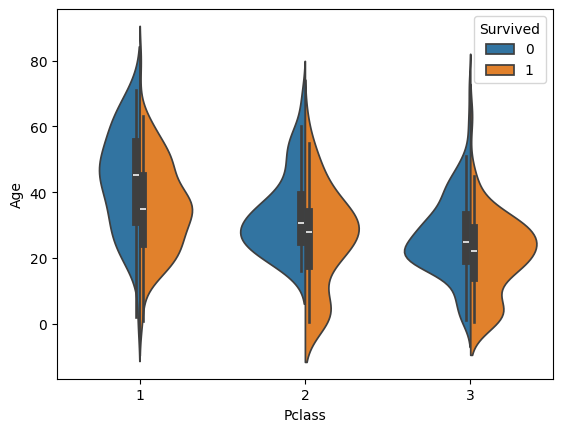

Text(0.5, 1.0, 'Survived vs dead by age in different ticket class')

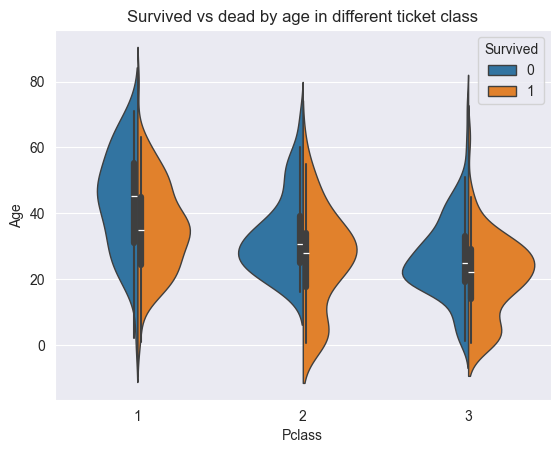

In [7]:
sns.violinplot(data=titanic_data_frame, x="Pclass", y="Age", hue="Survived",
               split=True, inner="box", linewidth=1).set_title("Survived vs dead by age in different ticket class")

З діаграми можна стверджувати що старші люди були переважно у першому класі та другому класі, і більша частина гинула. Але не дивлячись на це кількості смертей в цих класах менші, оскільки напевно їм надавались переваги у порятунку. Серед молодих людей другого класу загинуло більше ніж вижило, та сама ситуація і серед людей третього класу. Також більшість дітей (пасажирів до 20 років) більше у другому та третьому класі, і більшість з них вижила що свідчить що перевага у порятунку надавалась дітям.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


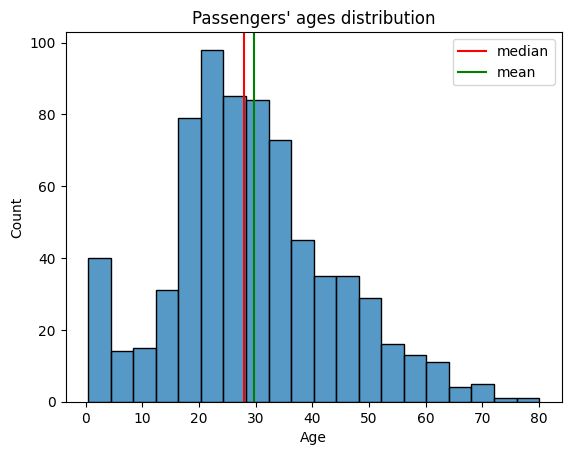

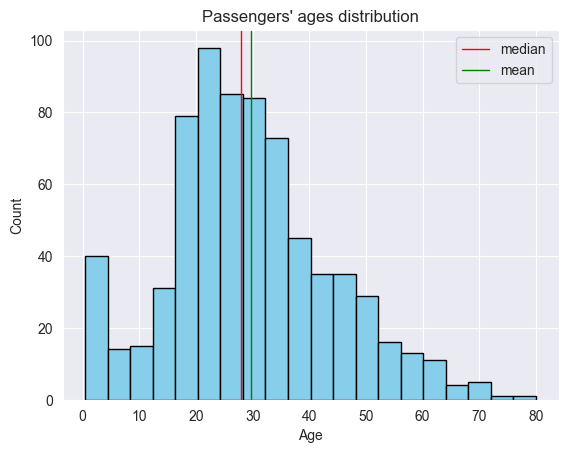

In [8]:
plt.hist(titanic_data_frame['Age'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(titanic_data_frame['Age'].median(), color='red', linewidth=1, label="median")
plt.axvline(titanic_data_frame['Age'].mean(), color='green', linewidth=1, label="mean")
plt.title("Passengers' ages distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

Можна зробити висновки що більше всього було пасажирів від 20 до 25, менше всього від 65,

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Відобразити кількість втрати данних про вік у пасажирів залежно від класу квитка

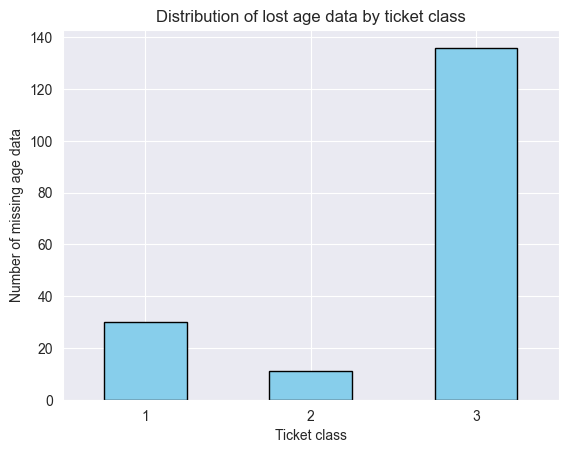

In [9]:
missing_age_by_class = titanic_data_frame[titanic_data_frame["Age"].isna()].groupby("Pclass").size()
missing_age_by_class.plot.bar(color="skyblue", edgecolor="black")
plt.title("Distribution of lost age data by ticket class")
plt.xlabel("Ticket class")
plt.ylabel("Number of missing age data")
plt.xticks(rotation=0)
plt.show()

З діаграми видно що більшість людей данні про вік яких втрачено, це люди з квитками третього класу, що на мою думку підтверджує моє припущення зроблене у завданні 4.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

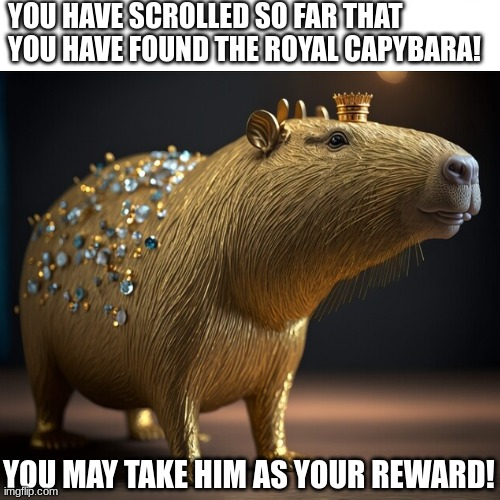